In [1]:
import biotite.structure as bs
import biotite.structure.io.pdb as pdb
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

DATA_DIR = "/data/fanga5/sabdab"

# Plotting structures

In [17]:
def get_loop_structure(ab_fname, loop_type, loop_start, loop_end):
    pdb_file = f"{DATA_DIR}/{ab_fname}"
    structure = pdb.PDBFile.read(pdb_file)
    atom_array = structure.get_structure()[0]
    atom_array = atom_array[atom_array.chain_id == loop_type[0]]
    residue_starts = bs.get_residue_starts(atom_array)
    loop_start_idx = residue_starts[loop_start]
    loop_end_idx = residue_starts[loop_end]
    loop_atoms = atom_array[loop_start_idx:loop_end_idx]
    pdb_file = pdb.PDBFile()
    pdb_file.set_structure(loop_atoms)
    pdb_file.write(f"/data2/fanga5/loop_structures/{loop_type}_{ab_fname}")

In [6]:
chains_df = pd.read_parquet("/data/fanga5/preprocessed_data/sabdab_2025-05-06-paired_chains.parquet")
loops_to_plot = []
with open("/homefs/home/fanga5/cdrcluster/paper_analyses/1_recovery_of_canonical_clusters/loops_to_plot.txt", "r") as f:
    for line in f.readlines():
        line = line.strip().split("_")
        loops_to_plot.append((int(line[0]), line[1]))

In [19]:
chains_df

,sabdab_id,ab_fname,chain_id,FW1_start,FW1_end,CDR1_start,CDR1_end,FW2_start,FW2_end,CDR2_start,...,FW3_end,CDR4_start,CDR4_end,FW4_start,FW4_end,CDR3_start,CDR3_end,FW5_start,FW5_end,sequence
0,0,0_8rtw_BA.pdb,H,0,22,22,35,35,49,49,...,71,71,79,79,96,96,105,105,116,EVQLQQPGPELVKPGASVKVSCKASGYSFTDHNMYWVKQSHGKSLE...
1,0,0_8rtw_BA.pdb,L,0,23,23,34,34,48,48,...,65,65,71,71,88,88,97,97,107,DIVMTQSPKFMSSSVGDRVSVTCKASQNVGINVAWYQQKPGQSPKA...
2,1,1_8rtw_DC.pdb,H,0,22,22,35,35,49,49,...,71,71,79,79,96,96,105,105,116,EVQLQQPGPELVKPGASVKVSCKASGYSFTDHNMYWVKQSHGKSLE...
3,1,1_8rtw_DC.pdb,L,0,23,23,34,34,48,48,...,65,65,71,71,88,88,97,97,107,DIVMTQSPKFMSSSVGDRVSVTCKASQNVGINVAWYQQKPGQSPKA...
4,2,2_8rtx_BA.pdb,H,0,22,22,35,35,49,49,...,71,71,79,79,96,96,107,107,118,QVQLVQSGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33487,18830,1yuh_BA.pdb,L,0,21,21,35,35,49,49,...,66,66,72,72,89,89,98,98,109,AVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDRLFT...
33488,18831,4ocr_HL.pdb,H,0,22,22,35,35,49,49,...,71,71,79,79,96,96,119,119,130,EVQVVESGGGVVQPGRSLRLSCTASGFTFSNFAMGWVRQAPGKGLE...
33489,18831,4ocr_HL.pdb,L,0,21,21,34,34,48,48,...,65,65,71,71,88,88,100,100,111,SVLTQPPSVSAAPGQKVTISCSGSSSTIGNNYVSWYRLLPGTAPKL...
33490,18832,5ihu_HL.pdb,L,0,20,20,33,33,47,47,...,64,64,70,70,87,87,98,98,109,VLNQPSSVSGSLGQRVSITCSGSSSNVGNGYVSWYQLIPGSAPRTL...


In [ ]:
align_string = ""
align_object = None
curr_loop_type = None
for sabdab_id, loop_type in loops_to_plot:
    chain_info = chains_df[(chains_df['sabdab_id']==sabdab_id) & (chains_df['chain_id']==loop_type[0])].iloc[0]
    get_loop_structure(chain_info['ab_fname'], loop_type, chain_info[f'CDR{loop_type[1]}_start'], chain_info[f'CDR{loop_type[1]}_end'])
    if loop_type != curr_loop_type:
        if curr_loop_type is not None:
            print(curr_loop_type, align_string)
        align_object = chain_info['ab_fname'].replace(".pdb", "")
        curr_loop_type = loop_type
        align_string = ""
    else:
        align_string += f'align {curr_loop_type}_{chain_info["ab_fname"].replace(".pdb", "")}, {curr_loop_type}_{align_object}; '

print(loop_type, align_string)

H1 align H1_8975_1q9l_BA, H1_10936_6xxv_DE; align H1_1048_8j6j_HH, H1_10936_6xxv_DE; align H1_6759_6a79_HL, H1_10936_6xxv_DE; align H1_3410_7x4m_HL, H1_10936_6xxv_DE; align H1_3004_7uz6_MN, H1_10936_6xxv_DE; align H1_24_8vs7_HL, H1_10936_6xxv_DE; align H1_15360_STR6496_HL, H1_10936_6xxv_DE; align H1_9906_5c8j_GH, H1_10936_6xxv_DE; align H1_1745_5xj3_JK, H1_10936_6xxv_DE; align H1_8649_6xgc_HL, H1_10936_6xxv_DE; align H1_10657_3ulu_HL, H1_10936_6xxv_DE; align H1_7784_3dsf_HL, H1_10936_6xxv_DE; align H1_16022_PRED1qmyc_AB, H1_10936_6xxv_DE; align H1_14501_4xx1_EG, H1_10936_6xxv_DE; align H1_14195_7rks_IM, H1_10936_6xxv_DE; align H1_7742_7lkg_AB, H1_10936_6xxv_DE; align H1_3632_7x7v_HL, H1_10936_6xxv_DE; align H1_3578_7yms_FE, H1_10936_6xxv_DE; align H1_1224_8wsq_AB, H1_10936_6xxv_DE; 
H2 align H2_8741_5nj3_CD, H2_4328_4lkx_AB; align H2_13191_6u52_C, H2_4328_4lkx_AB; align H2_6h7o_C, H2_4328_4lkx_AB; align H2_15953_PRED1ohyg_CD, H2_4328_4lkx_AB; align H2_8uhn_AB, H2_4328_4lkx_AB; align H2

# Plotting sequence logo

In [ ]:
loops_for_sequence_logo = []
chains_df = pd.read_parquet("/data/fanga5/preprocessed_data/sabdab_2025-05-06-paired_chains.parquet")
with open("/homefs/home/fanga5/cdrcluster/paper_analyses/1_recovery_of_canonical_clusters/loops_for_sequence_logo.txt", "r") as f:
    for line in f.readlines():
        line = line.strip().split("_")
        loops_for_sequence_logo.append((int(line[0]), line[1]))

H3_pdb_codes = []
sequences = defaultdict(list)
for sabdab_id, loop_type in tqdm(loops_for_sequence_logo, desc="Processing loops", total=len(loops_for_sequence_logo)):
    chain_info = chains_df[(chains_df['sabdab_id']==sabdab_id) & (chains_df['chain_id']==loop_type[0])].iloc[0]
    loop_sequence = chain_info['sequence'][chain_info[f'CDR{loop_type[1]}_start']:chain_info[f'CDR{loop_type[1]}_end']]
    if loop_type == 'H3':
        ab_fname = chain_info['ab_fname']
        ab_fname = ab_fname.split("_")
        for ab_fname_split in ab_fname:
            if (not ab_fname_split.isdigit()) and (len(ab_fname_split) == 4):
                H3_pdb_codes.append(ab_fname_split)
                break
    sequences[loop_type].append(loop_sequence)

for loop_type, seq_list in sequences.items():
    print(loop_type, len(seq_list), len(set(seq_list)))

Processing loops:   0%|          | 37/14868 [00:00<00:40, 363.96it/s]

Processing loops: 100%|██████████| 14868/14868 [00:42<00:00, 351.92it/s]


H1 1792 704
H2 721 267
H3 387 1
L1 2002 533
L2 4194 818
L3 2530 734
H4 1560 289
L4 1682 51


In [11]:
H3_pdb_codes

['8xor',
 '9ijd',
 '9ije',
 '8jjp',
 '8tzq',
 '8xgm',
 '8k6m',
 '8k6n',
 '8k6o',
 '8kgg',
 '8k3z',
 '8xqn',
 '8xqo',
 '8xqs',
 '8xqt',
 '8zbe',
 '8zcj',
 '8zqe',
 '8wss',
 '8yuu',
 '8k9k',
 '8k9l',
 '8uwl',
 '8ykw',
 '8ykx',
 '8jpn',
 '8xbe',
 '8x16',
 '8x17',
 '9axf',
 '8iz4',
 '8xog',
 '8xoh',
 '8xoi',
 '8xoj',
 '8j6i',
 '8j6l',
 '8x2k',
 '8iu2',
 '8jxv',
 '8jxw',
 '8iy9',
 '8iyh',
 '8jer',
 '8jhn',
 '8jbf',
 '8jt6',
 '8xjl',
 '8xjm',
 '8xjo',
 '8i7v',
 '8i7w',
 '8iec',
 '8kfx',
 '8kfy',
 '8kfz',
 '8j20',
 '8j21',
 '8t3q',
 '8t3s',
 '8t3v',
 '8t3o',
 '8j6j',
 '8jgf',
 '8jgg',
 '8ij3',
 '8ija',
 '8ijb',
 '8ijd',
 '8w8r',
 '8wc6',
 '8wc3',
 '8wc5',
 '8wc7',
 '8wc8',
 '8wc9',
 '8xbh',
 '8u1u',
 '8feg',
 '8j6p',
 '8j6q',
 '8j6r',
 '8hnk',
 '8hnl',
 '8hnm',
 '8k2x',
 '8w8b',
 '8wpu',
 '8jlj',
 '8jln',
 '8jlq',
 '8jlr',
 '8jso',
 '8jsp',
 '8wrb',
 '8g05',
 '8sg1',
 '8k4n',
 '8hpt',
 '8hqc',
 '8i95',
 '8i97',
 '8i9a',
 '8i9l',
 '8i9s',
 '8ia2',
 '8j6d',
 '8jzz',
 '8h2g',
 '8jz7',
 '8sai',
 

In [10]:
print("H3", len(set(H3_pdb_codes)))

H3 386


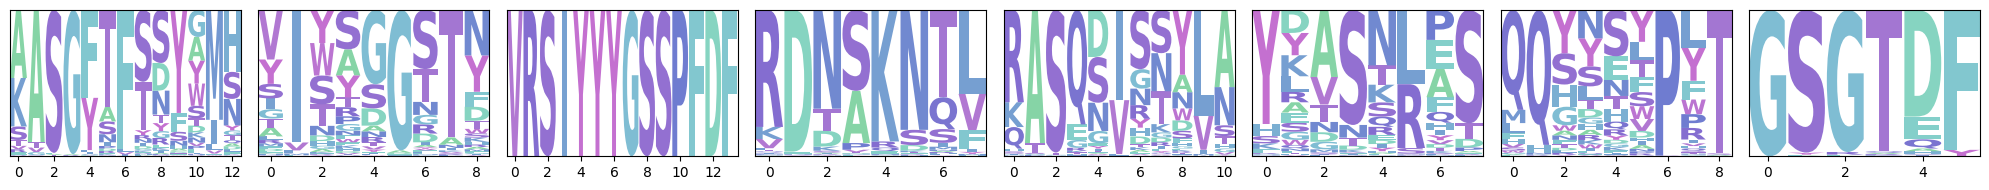

In [59]:
import logomaker
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

amino_acids = list('ACDEFGHIKLMNPQRSTVWY')

# Define base colors for the gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_gradient", ['#86D4A6', '#86D4C7', '#80C0D3', '#769FD1', '#769FD1', '#6E7DD0', '#866BD0', '#AD7AD3', '#C470D0']
)

# Get 20 colors from the gradient
colors = [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, 20)]

# Create color scheme dictionary
color_scheme = dict(zip(amino_acids, colors))

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 2))
for i, loop_type in enumerate(['H1', 'H2', 'H3', 'H4', 'L1', 'L2', 'L3', 'L4']):
    if loop_type not in sequences:
        continue
    ax = axes[i]
    # ax.set_title(f"{loop_type}")
    counts_mat = logomaker.alignment_to_matrix(sequences=sequences[loop_type], to_type='counts')
    logo = logomaker.Logo(counts_mat, color_scheme=color_scheme, ax=ax)
    ax.set_yticks([])
    ax.set_xticks(range(0, len(sequences[loop_type][0]), 2))
plt.tight_layout()
plt.savefig("sequence_logo.svg", format='svg', bbox_inches='tight')
plt.show()